## Decision and Regression Trees

Decision Trees are a type of supervised machine learning algorithm that is highly versatile and can be used for both classification and regression tasks. They are one of the most interpretable models in machine learning, as their decision making process can be visualized as a flowchart-like tree structure. The algorithm works by recursively splitting the dataset into smaller and smaller subsets based on the features that provide the most information gain. Each internal node in the tree represents a "test" on a feature, each branch represents the outcome of the test, and each leaf node represents a class label (in classification) or a continuous value (in regression).

<img src="dectree1.png" width="600"/>

<img src="regtree1.png" width="600"/>

Decision Trees are fundamental to many advanced ensemble methods like Random Forests and Gradient Boosting. They are popular due to their simplicity, interpretability, and ability to handle both numerical and categorical data.

In this project, we will explore both applications of this algorithm using our 2023 NBA player dataset:

1.  Decision Tree Classifier: We will train a model to predict a player's primary court position (Guard, Forward, or Center).
2.  Decision Tree Regressor: We will train a model to predict a player's TOTAL points over a whole season (not points per game).

This demonstrates how Decision Trees can solve two different kinds of problems.

We will use the following libraries:

1. matplotlib (https://matplotlib.org/)
2. numpy (https://numpy.org/)
3. pandas (https://pandas.pydata.org/)
4. seaborn (https://seaborn.pydata.org/)
5. scikit learn (https://scikit-learn.org/)

Start by importing them, then loading our dataset.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn import metrics

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context('talk')

df = pd.read_csv('2023_nba_player_stats.csv', encoding='latin1')

## Part 1: Classification

Now we need to briefly clean up the data to make it easier to read, as well as reclassifying positions for the first part of our project.

In [33]:
df.columns = [col.strip().lower() for col in df.columns]
df = df.dropna(subset=['pos', 'pts', 'ast', 'reb']).copy()
df = df.fillna(0)
pos_map = {'P': 'G', 'S': 'F', 'C': 'C'}
df['position_simple'] = df['pos'].str[0].map(pos_map)
df_classifier = df[df['position_simple'].isin(['G', 'F', 'C'])].copy()

print("\nClass distribution:")
print(df_classifier['position_simple'].value_counts())


Class distribution:
position_simple
F    173
G    151
C     78
Name: count, dtype: int64


Now, we will pick the feature stats we are using for classification, as well as splitting and standardizing data.

In [34]:
features_cls = ['age', 'gp', 'pts', 'reb', 'ast', 'stl', 'blk', 'fg%', '3p%', 'ft%']
X_cls = df_classifier[features_cls]
y_cls = df_classifier['position_simple']

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls)

scaler_cls = StandardScaler()
X_train_scaled_cls = scaler_cls.fit_transform(X_train_cls)
X_test_scaled_cls = scaler_cls.transform(X_test_cls)

Now that we've set everything up, we can train our Decision Tree Classifier model.

In [35]:
dt_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_classifier.fit(X_train_scaled_cls, y_train_cls)

y_pred_cls = dt_classifier.predict(X_test_scaled_cls)

print(f"\nDecision Tree Classifier Accuracy: {accuracy_score(y_test_cls, y_pred_cls):.4f}\n")
print("Classification Report:")
print(classification_report(y_test_cls, y_pred_cls))


Decision Tree Classifier Accuracy: 0.4938

Classification Report:
              precision    recall  f1-score   support

           C       0.59      0.62      0.61        16
           F       0.50      0.71      0.59        35
           G       0.36      0.17      0.23        30

    accuracy                           0.49        81
   macro avg       0.48      0.50      0.47        81
weighted avg       0.46      0.49      0.46        81



To better visualize our results, let's plot it in a tree.

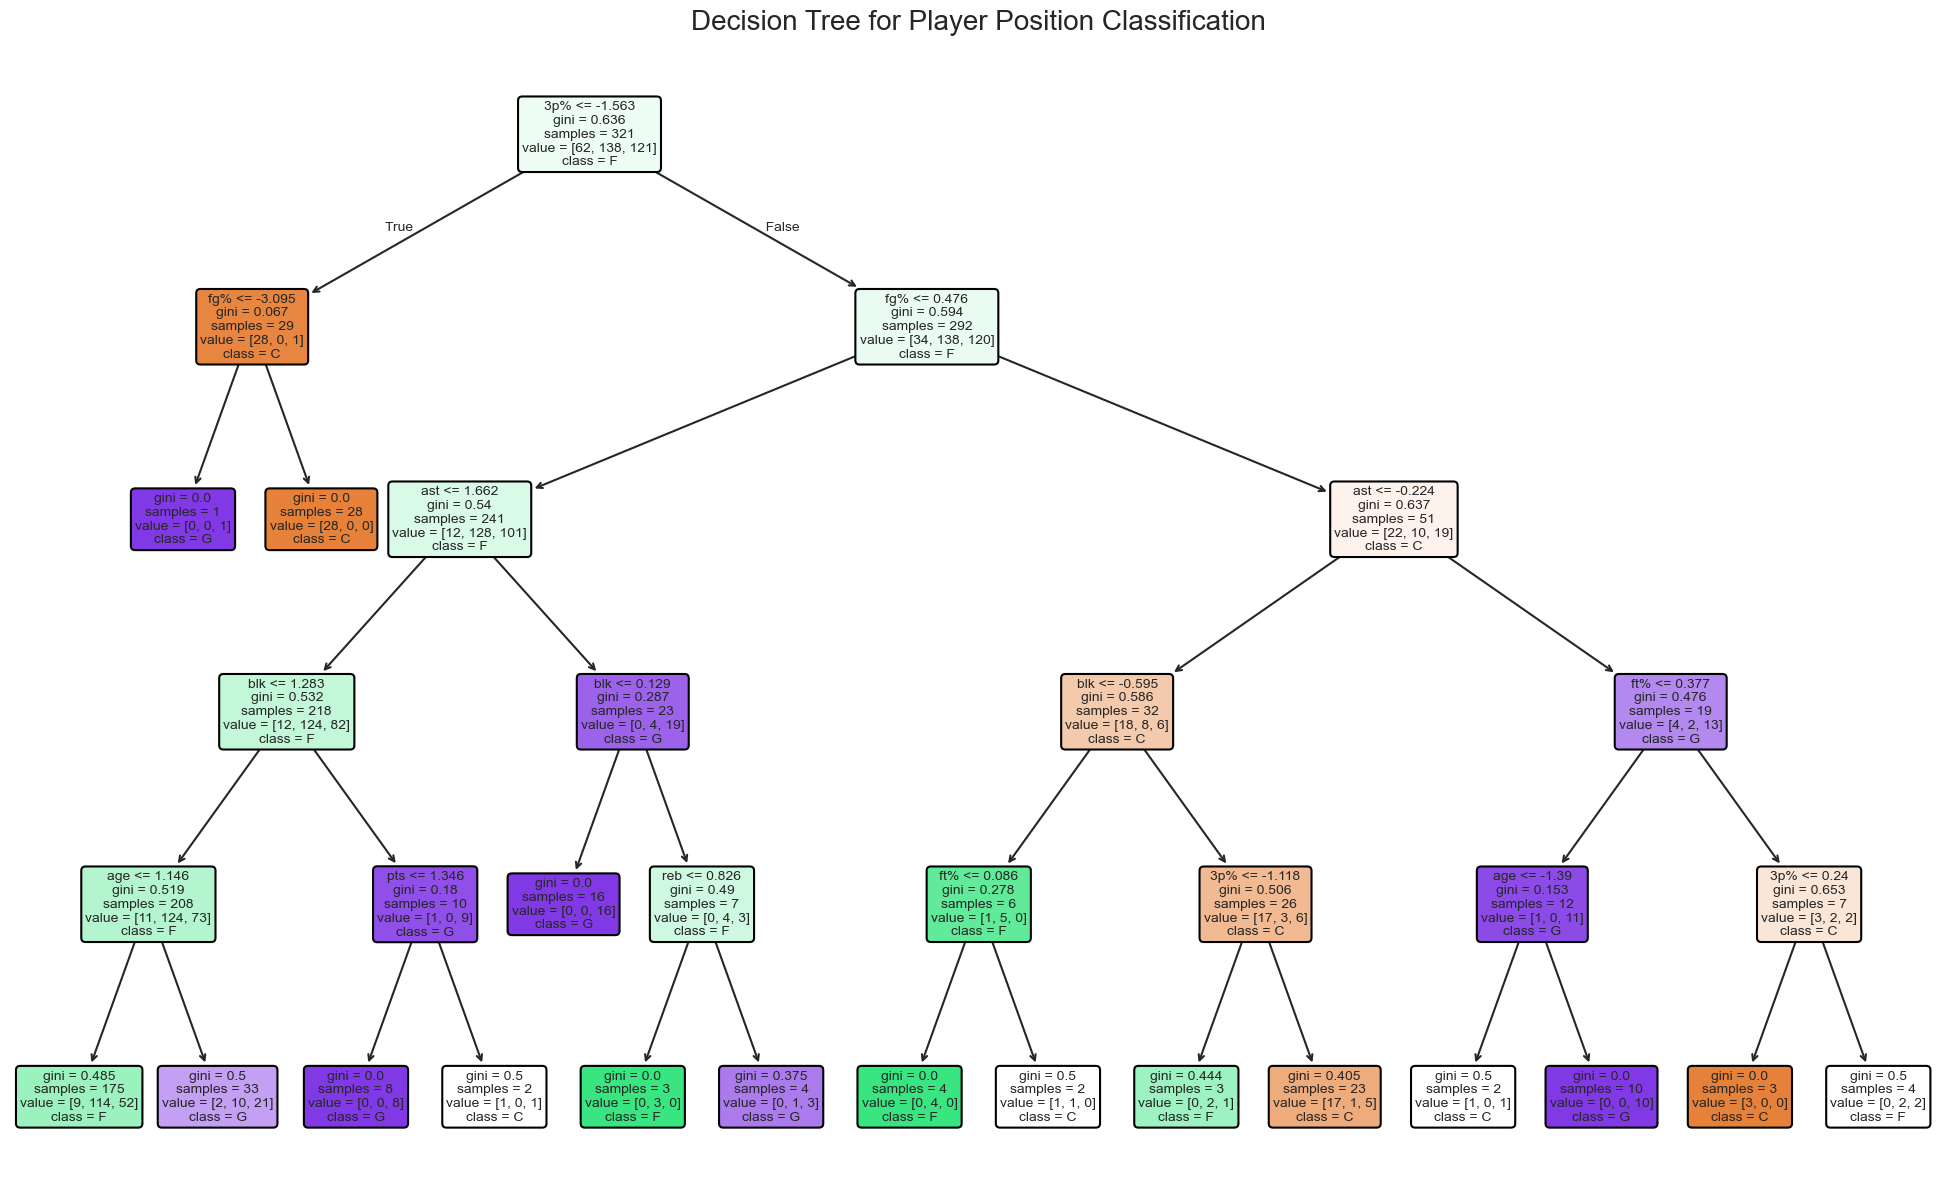

In [36]:
plt.figure(figsize=(25, 15))
plot_tree(dt_classifier, feature_names=features_cls, class_names=dt_classifier.classes_, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree for Player Position Classification", fontsize=20)
plt.show()

Compared to the KNN algorithm that we used on this same dataset, this model does a better job of explaining where the inaccuracies come from. We see 3 point percentage in the root as the most important distinguisher. This makes sense, as the best way to distinguish between centers and forwards/guards is how good they are at shooting threes. While positional basketball has made lots of progress, centers still tend to shoot threes very poorly. In fact, the model is able to classify one kind of center very quickly: the center who can't shoot anywhere. This makes sense, as many centers are on the court simply for defensive purposes and are huge liabilitys on offense. This is just an example, but looking at three point percentage and field goal percentage look to be the most important ways of narrowing down positions for this model. After that, the model goes into the counting stats of assists blocks and rebounds, and we see age at the very bottom to indicate its lack of importance for predictions (which makes sense, as there are players of all ages at all positions).

The model learned that rebounds and blocks are great for separating centers, while assists help separate Guards. Combined with the Classification Report, this tree explains the results we see, where overall the model is better at identifying centers and forwards, who tend to get more rebounds and blocks due to their size, compared to guards, who sometimes can get lots of rebounds due to athleticism but sometimes can't, for example.

## Part 2: Regression

Our task is now to predict a player's points per game. Let's set up our variables first.

In [37]:
features_reg = ['age', 'gp', 'reb', 'ast', 'stl', 'blk', 'fg%', '3p%', 'ft%']
X_reg = df[features_reg]
y_reg = df['pts']

Then let's split up the training data.

In [38]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

scaler_reg = StandardScaler()
X_train_scaled_reg = scaler_reg.fit_transform(X_train_reg)
X_test_scaled_reg = scaler_reg.transform(X_test_reg)

Now, we will initialize and train our model on this data.

In [39]:
dt_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_regressor.fit(X_train_scaled_reg, y_train_reg)

y_pred_reg = dt_regressor.predict(X_test_scaled_reg)

print(f"R-squared (R2): {r2_score(y_test_reg, y_pred_reg):.4f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test_reg, y_pred_reg):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test_reg, y_pred_reg):.4f}")

R-squared (R2): 0.7204
Mean Absolute Error (MAE): 191.6358
Mean Squared Error (MSE): 88478.5564


Visualize it in the tree below:

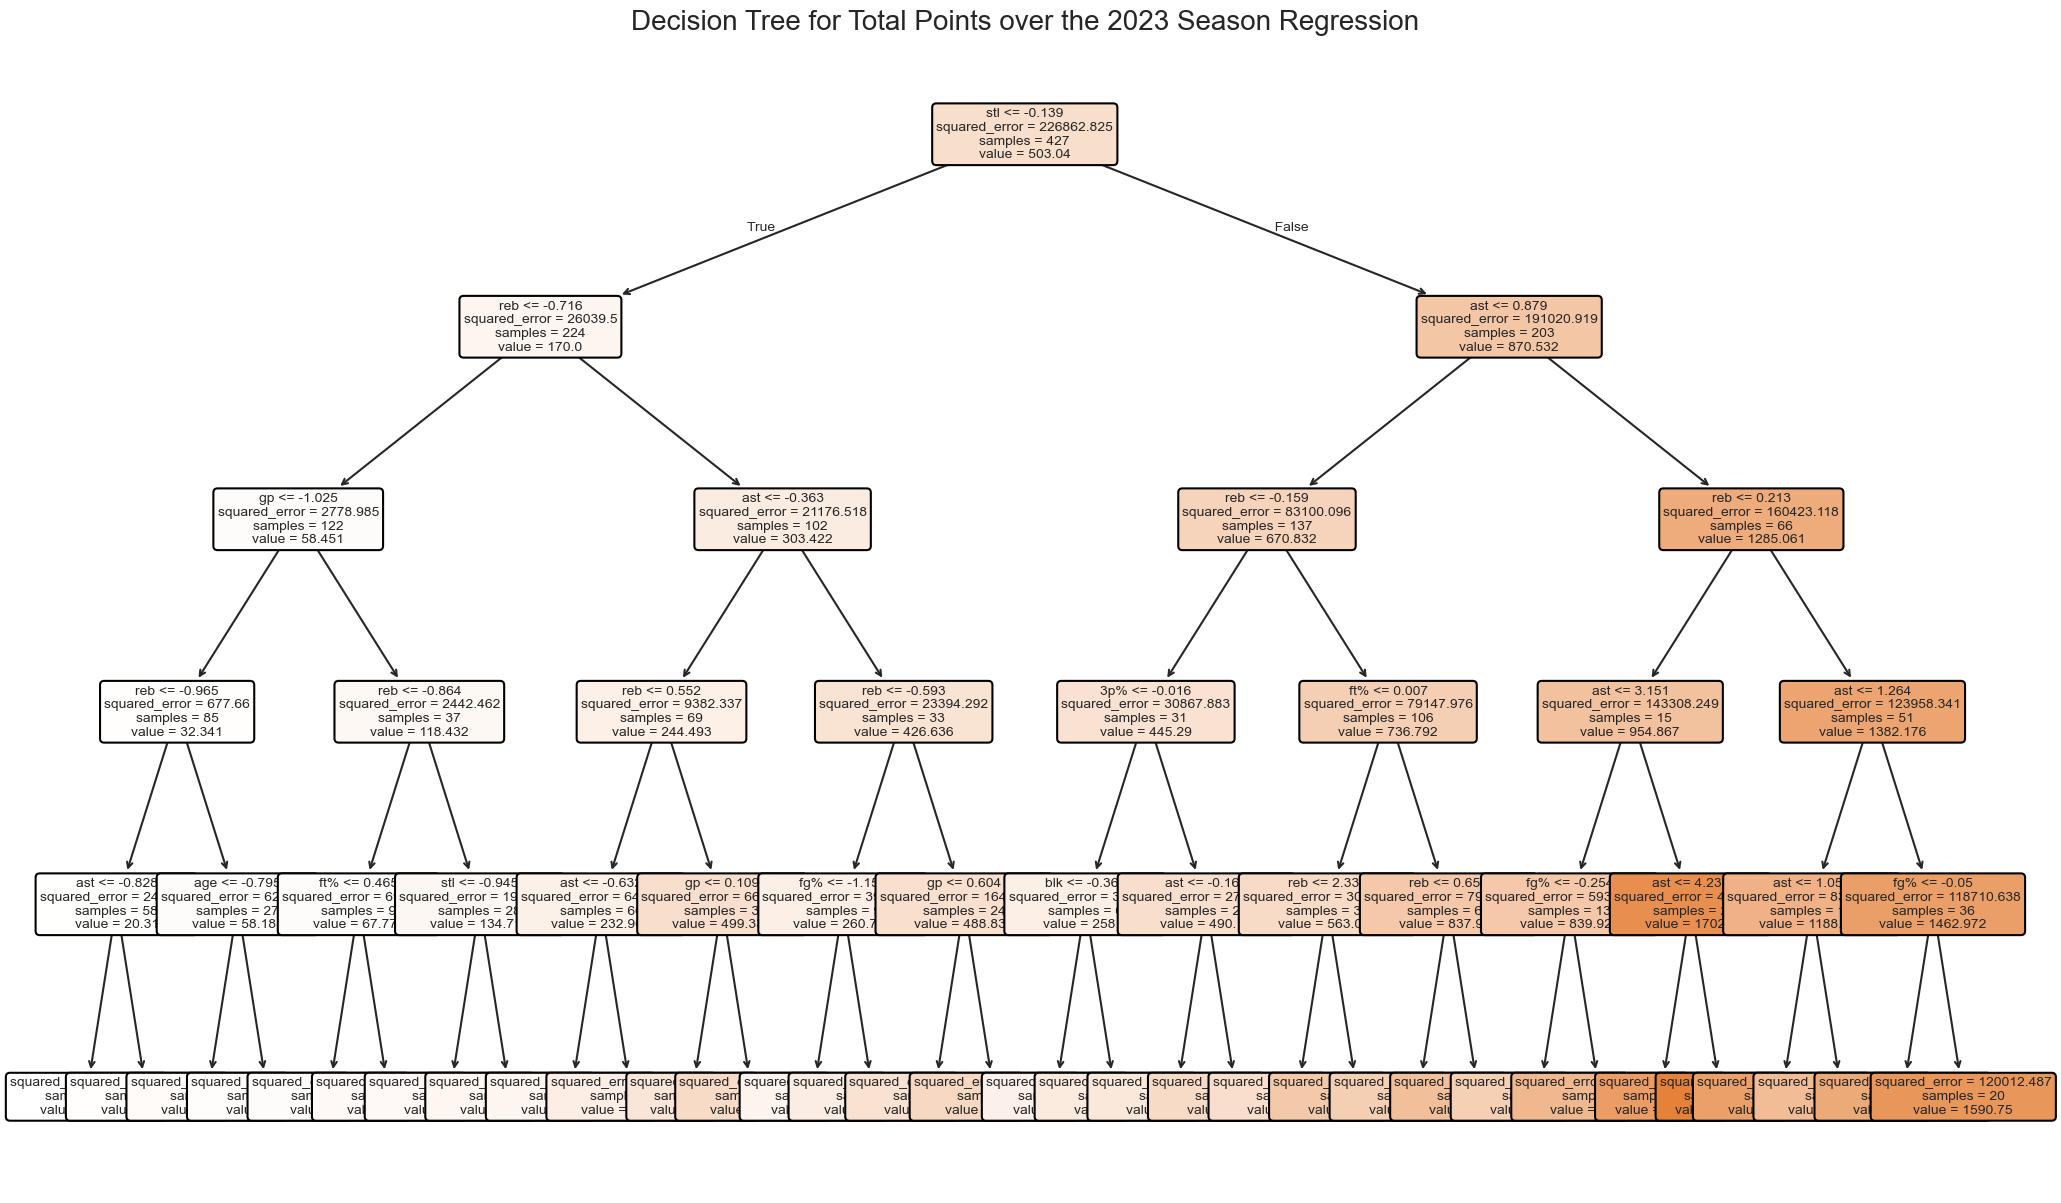

In [40]:
plt.figure(figsize=(25, 15))
plot_tree(dt_regressor, feature_names=features_reg, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree for Total Points over the 2023 Season Regression", fontsize=20)
plt.show()

As a whole, the R squared suggests a high degree of accuracy by using the basic statistics to predict points per game. The error values might seem large at first, though this is explained by the dataset containing total points over the whole season, as opposed to points per game. In that context, the error makes sense (for example, Jayson Tatum was the total points leader this season with 2225 total points). In short, we take all of this into account to see that this model does pretty well in using the basic box score stats to predict player total points over a season.